In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_data=pd.read_csv("/content/drive/MyDrive/Datasets/Flight_Data_Train.csv")
test_data=pd.read_csv("/content/drive/MyDrive/Datasets/Flight_Data_Test.csv")

In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
print(train_data.shape)
print(test_data.shape)

(10683, 11)
(2671, 10)


# Firstly merge both the data set for cleaning,EDA and feature Engeneering purpose.

In [ ]:
train_data["indentification"]="train"
test_data["indentification"]="test"

In [ ]:
train_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,indentification
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,train


In [ ]:
test_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,indentification
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,test


In [ ]:
#now append  both the dataset

In [ ]:
#use the concat for 
df = pd.concat([train_data, test_data])

In [ ]:
df.shape

(13354, 12)

In [ ]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,indentification
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train


In [ ]:
df.tail(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,indentification
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN,test


# drop all the Duplicates values

In [ ]:
df=df.drop_duplicates()
df.shape

(13108, 12)

# Check the Null values First and Handle these null values

In [ ]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2645
indentification       0
dtype: int64

There are not null values present in the dataset only price columns which are test data where price is not mentioned and this is totally fair. there is only one null values and we can drop that easily and carefully

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,indentification
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train


In [ ]:
data=df.copy()

In [ ]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,indentification
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train


In [ ]:
data[data["Route"]==np.nan]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,indentification


In [ ]:
data[data["Route"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,indentification
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0,train


In [ ]:
data=data.drop(9039,axis=0)
data.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2645
indentification       0
dtype: int64

now null values has been removed


# now Look at the EDA part 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13107 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13107 non-null  object 
 1   Date_of_Journey  13107 non-null  object 
 2   Source           13107 non-null  object 
 3   Destination      13107 non-null  object 
 4   Route            13107 non-null  object 
 5   Dep_Time         13107 non-null  object 
 6   Arrival_Time     13107 non-null  object 
 7   Duration         13107 non-null  object 
 8   Total_Stops      13107 non-null  object 
 9   Additional_Info  13107 non-null  object 
 10  Price            10462 non-null  float64
 11  indentification  13107 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.3+ MB


In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,indentification
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train


# ## as we can see that there are many format like date, time and object , then we need to convert all the columns according to there format

In [ ]:
data["Date_of_Journey"]=pd.to_datetime(data["Date_of_Journey"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13107 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          13107 non-null  object        
 1   Date_of_Journey  13107 non-null  datetime64[ns]
 2   Source           13107 non-null  object        
 3   Destination      13107 non-null  object        
 4   Route            13107 non-null  object        
 5   Dep_Time         13107 non-null  object        
 6   Arrival_Time     13107 non-null  object        
 7   Duration         13107 non-null  object        
 8   Total_Stops      13107 non-null  object        
 9   Additional_Info  13107 non-null  object        
 10  Price            10462 non-null  float64       
 11  indentification  13107 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 1.3+ MB


We need to extract Day and Month as the new feature they will be very helpful


In [ ]:
data["Journey_Day"]=pd.to_datetime(data["Date_of_Journey"],format="%d%m%y").dt.day
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,indentification,Journey_Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,3


In [ ]:
data["Journey_Month"]=pd.to_datetime(data["Date_of_Journey"],format="%d%m%y").dt.month

In [ ]:
data["Journey_Year"]=pd.to_datetime(data["Date_of_Journey"],format="%d%m%y").dt.year

In [ ]:
data["Journey_Year"].value_counts()


2019    13107
Name: Journey_Year, dtype: int64

## as all the recods of 2019 so no need to add the year ahead in our data

In [ ]:
data=data.drop("Journey_Year",axis=1)

In [ ]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,indentification,Journey_Day,Journey_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train,24,3


as There is Date is Journey is already present we don't need to date in the time section so will drop the date from time section and convert that into the time format

In [ ]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,indentification,Journey_Day,Journey_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train,24,3


In [ ]:
data["Arrival_Time"]=data["Arrival_Time"].str.split().str[0]

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,indentification,Journey_Day,Journey_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,train,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,train,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,3,1


In [ ]:
## to extract the hour and minute from the Arrival Time
data["Arr_Hour"]=data["Arrival_Time"].str.split(":").str[0]
data["Arr_Minute"]=data["Arrival_Time"].str.split(":").str[1]

In [ ]:
## to extract the hour and minute from the Departure Time
data["Dep_Hour"]=data["Dep_Time"].str.split(":").str[0]
data["Dep_Minute"]=data["Dep_Time"].str.split(":").str[1]

In [ ]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,indentification,Journey_Day,Journey_Month,Arr_Hour,Arr_Minute,Dep_Hour,Dep_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,train,24,3,01,10,22,20


In [ ]:
#this splitling for the extract the duration hour
data["Duration_Hour"]=data["Duration"].str.split().str[0].str.split("h").str[0]

In [ ]:
data["Duration_Hour"].value_counts()

2     2949
1      785
3      626
5      608
7      600
9      551
12     534
8      531
13     488
11     464
10     459
6      442
14     424
15     333
23     305
16     285
4      278
26     264
24     238
22     231
25     228
27     217
21     210
20     202
18     166
17     160
19     158
28     115
29      61
30      59
38      38
37      22
33      18
32      12
35      10
36       9
34       8
31       8
47       2
42       2
39       2
5m       2
40       2
41       1
Name: Duration_Hour, dtype: int64

In [ ]:
data["Duration_Hour"]=np.where(data["Duration_Hour"]=="5m",0,data["Duration_Hour"])

In [ ]:
data["Duration_Hour"].value_counts()

2     2949
1      785
3      626
5      608
7      600
9      551
12     534
8      531
13     488
11     464
10     459
6      442
14     424
15     333
23     305
16     285
4      278
26     264
24     238
22     231
25     228
27     217
21     210
20     202
18     166
17     160
19     158
28     115
29      61
30      59
38      38
37      22
33      18
32      12
35      10
36       9
34       8
31       8
47       2
42       2
39       2
0        2
40       2
41       1
Name: Duration_Hour, dtype: int64

In [ ]:
#this is for the extract the duration minute
data["Duration_Minute"]=data["Duration"].str.split().str[1].str.split("m").str[0]

In [ ]:
data["Duration_Minute"].value_counts()

30    1790
20    1240
50    1181
35    1140
45    1128
15    1113
55    1059
25    1006
40     787
5      763
10     642
Name: Duration_Minute, dtype: int64

## as there are many flight will be only in hour then minute selection will be NaN. Let's check these value in duration_minute

In [ ]:
data[data["Duration_Minute"].isnull()].head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,indentification,Journey_Day,Journey_Month,Arr_Hour,Arr_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,train,6,9,04,25,09,25,19,NaN
18,Air India,2019-12-06,Delhi,Cochin,DEL → CCU → BOM → COK,20:15,19:15,23h,2 stops,No info,13381.0,train,6,12,19,15,20,15,23,NaN
33,Jet Airways,2019-06-15,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35,22h,2 stops,In-flight meal not included,10919.0,train,15,6,12,35,14,35,22,NaN
44,Multiple carriers,2019-03-21,Delhi,Cochin,DEL → BOM → COK,09:00,21:00,12h,1 stop,No info,13062.0,train,21,3,21,00,09,00,12,NaN


In [ ]:
data["Duration_Minute"].isnull().sum()

1258

## Now fill the NaN values with 0 because the reason of nan is mean there is not minute only the hour

In [ ]:
data["Duration_Minute"]=data["Duration_Minute"].fillna(0)

In [ ]:
data["Duration_Minute"].isnull().sum()

0

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,indentification,Journey_Day,Journey_Month,Arr_Hour,Arr_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,train,24,3,01,10,22,20,2,50


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Airline', ylabel='count'>

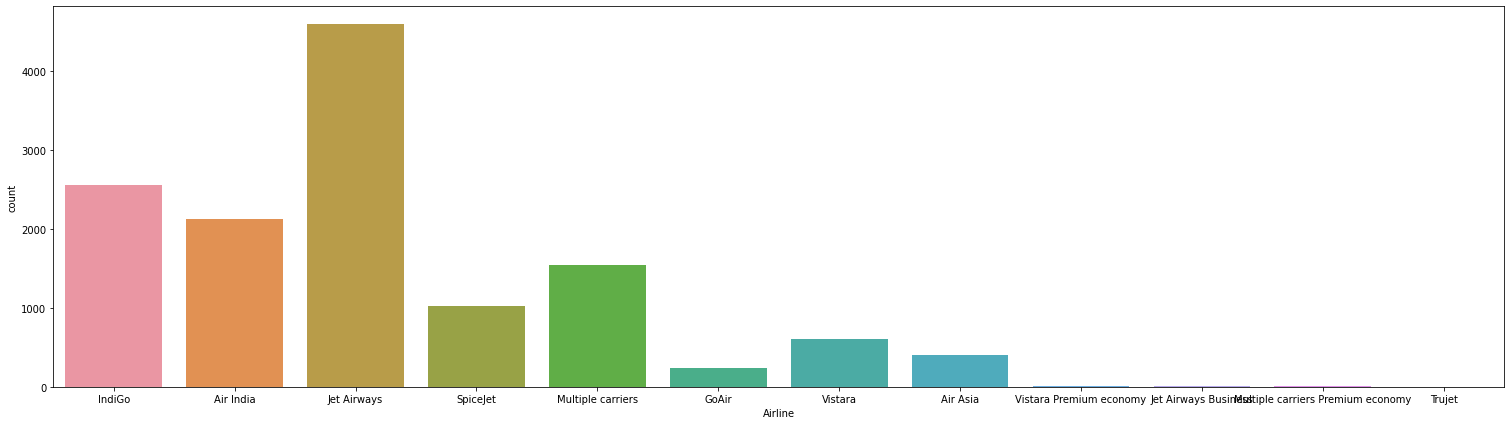

In [ ]:
#now see the Airline Feature and Explore
plt.figure(figsize=(26,7))
sns.countplot(data["Airline"])

In [ ]:
data["Airline"].value_counts()

Jet Airways                          4586
IndiGo                               2552
Air India                            2126
Multiple carriers                    1539
SpiceJet                             1023
Vistara                               607
Air Asia                              405
GoAir                                 239
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
## as there some airline are these which are not neeccesory or not too much count then will convert them as other airways

In [ ]:
labels=data["Airline"].value_counts()

In [ ]:
lower_airline=labels[labels<20]
lower_airline

Multiple carriers Premium economy    16
Jet Airways Business                  8
Vistara Premium economy               5
Trujet                                1
Name: Airline, dtype: int64

In [ ]:
def other_airline(x):
  if x in lower_airline:
    return "Other Airline"
  else:
    return x

In [ ]:
data["Airline"]=data["Airline"].apply(other_airline)

In [ ]:
#compare the price of all airlines
type(data.groupby("Airline")["Price"].sum())

pandas.core.series.Series

In [ ]:
data.groupby("Airline")["Price"].sum().values

array([ 1783293., 16188894.,  1137045., 11580684., 42916378., 13039603.,
         529624.,  3533711.,  3729048.])

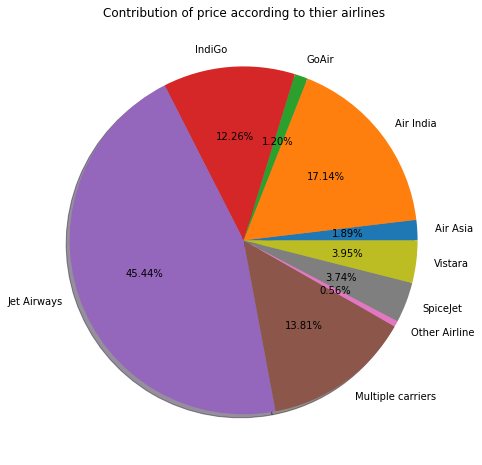

In [ ]:
##make a pie chart using the airlines 
plt.figure(figsize=(15,8))
plt.title("Contribution of price according to thier airlines")
label=data.groupby("Airline")["Price"].sum().index
value=data.groupby("Airline")["Price"].sum().values
plt.pie(value,labels=label,autopct='%.2f%%',shadow=True)
plt.show()

# Encoding way
1.   if there is any order or sequence value or ranking use label encoder
2.   if there is not ranking or sequence then will use one hot encoding 



<Figure size 1080x576 with 0 Axes>

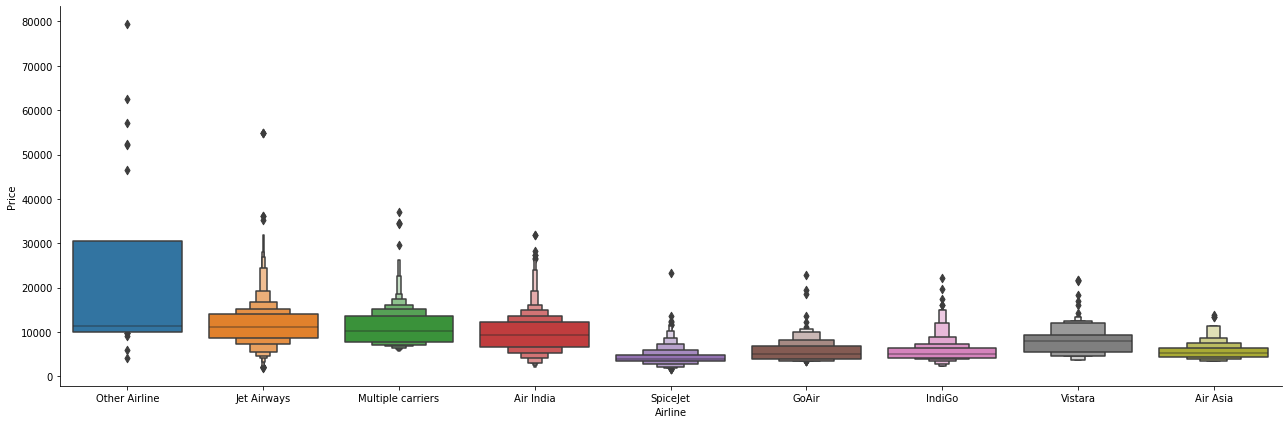

In [ ]:
##it is good to use catplot in the categorical feature with the target feature
plt.figure(figsize=(15,8))
sns.catplot(y="Price",x="Airline",data=data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

as we can see other airline are total mashup which are small small airline merge but most is Jet Airways and also the hight price contain jet airways

In [ ]:
## as Airline is nominal  Categorical  data means there is not ranking then we need to use one-hot encoding 

In [ ]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,indentification,Journey_Day,Journey_Month,Arr_Hour,Arr_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,train,24,3,01,10,22,20,2,50


In [ ]:
Airline=pd.get_dummies(data["Airline"],drop_first=True)


In [ ]:
data = pd.get_dummies(data, columns = ['Airline'],drop_first=True)

In [ ]:
data.head(1)

,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,indentification,Journey_Day,Journey_Month,Arr_Hour,Arr_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other Airline,Airline_SpiceJet,Airline_Vistara
0,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,train,24,3,01,10,22,20,2,50,0,0,1,0,0,0,0,0


In [ ]:
data["Source"].value_counts()

Delhi       5472
Kolkata     3567
Banglore    2729
Mumbai       883
Chennai      456
Name: Source, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


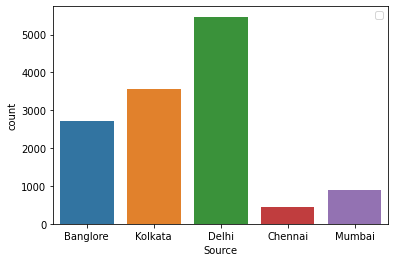

In [ ]:
sns.countplot(data["Source"])
plt.legend()
plt.show()

most of the Flight are take off from the Delhi and Kolkata

In [ ]:
data.groupby("Source")["Price"].sum()

Source
Banglore    17481840.0
Chennai      1824949.0
Delhi       45455655.0
Kolkata     26149219.0
Mumbai       3526617.0
Name: Price, dtype: float64

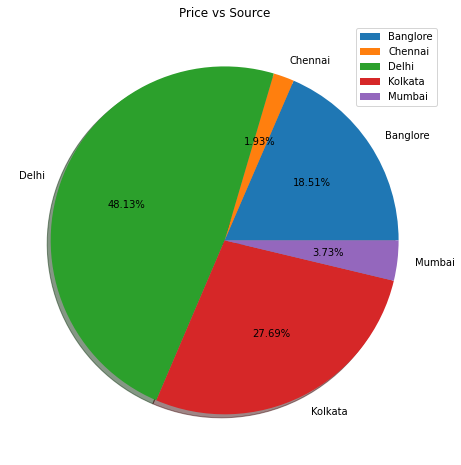

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Price vs Source")
label=data.groupby("Source")["Price"].sum().index
value=data.groupby("Source")["Price"].sum().values
plt.pie(value,labels=label,autopct="%0.2f%%",shadow=True)
plt.legend()
plt.show()

<Figure size 1080x576 with 0 Axes>

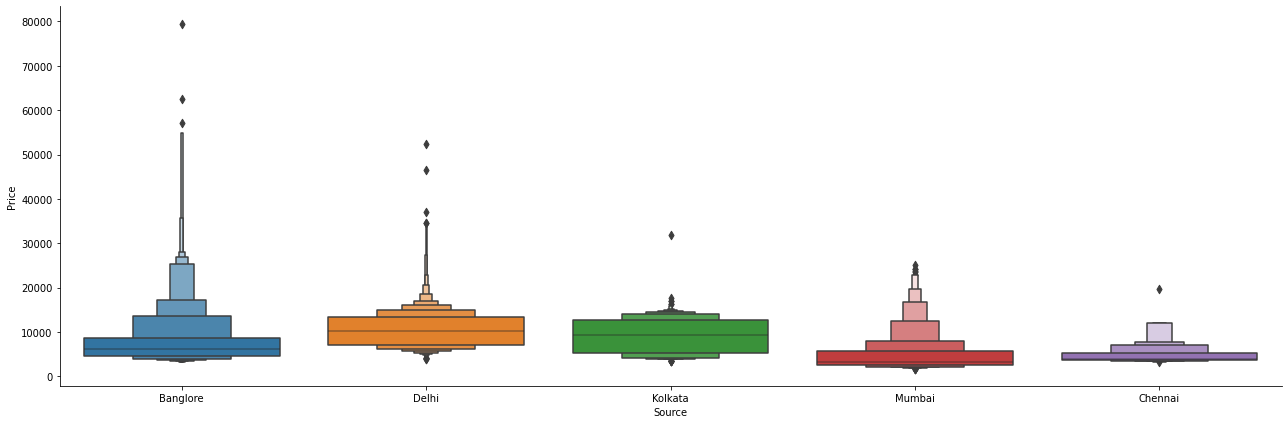

In [ ]:
plt.figure(figsize=(15,8))
sns.catplot(y="Price",x="Source",data=data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [ ]:
source=pd.get_dummies(data["Source"],drop_first=True)
source

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
2666,0,0,1,0
2667,0,0,1,0
2668,0,1,0,0
2669,0,1,0,0


In [ ]:
data=pd.get_dummies(data,columns=["Source"],drop_first=True)

In [ ]:
data.head(1)

,Date_of_Journey,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,indentification,Journey_Day,Journey_Month,Arr_Hour,Arr_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other Airline,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,2019-03-24,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,train,24,3,01,10,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
data["Destination"].value_counts()

Cochin       5472
Banglore     3567
Delhi        1582
New Delhi    1147
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Destination', ylabel='count'>

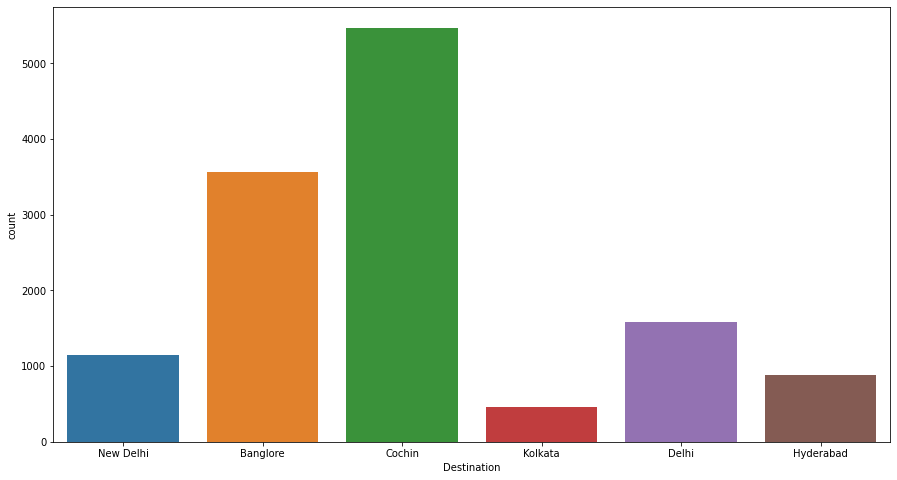

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data["Destination"])

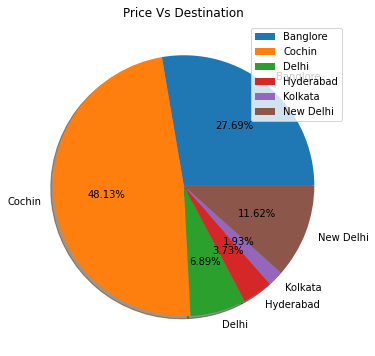

In [ ]:
##lets compare with price
plt.figure(figsize=(15,6))
plt.title("Price Vs Destination")
label=data.groupby("Destination")["Price"].sum().index
value=data.groupby("Destination")["Price"].sum().values
plt.pie(value,labels=label,autopct="%0.2f%%",shadow=True)
plt.legend()
plt.show()

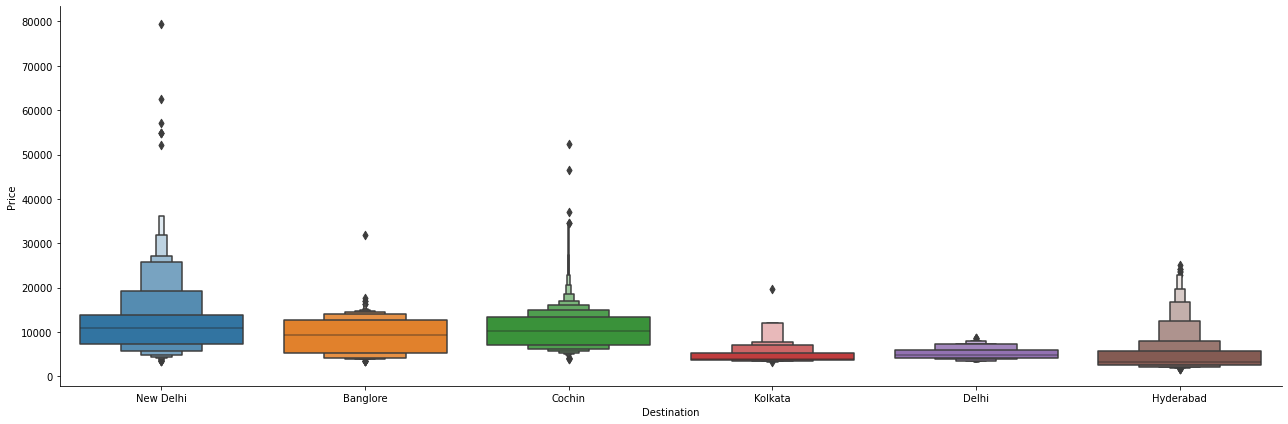

In [ ]:
##using the catplot as well
sns.catplot(y="Price",x="Destination",data=data,aspect=3,height=6,kind="boxen")

In [ ]:
destination=pd.get_dummies(data["Destination"],drop_first=True)
destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
2666,0,0,0,0,0
2667,0,0,0,0,0
2668,1,0,0,0,0
2669,1,0,0,0,0


In [ ]:
data=pd.get_dummies(data,columns=["Destination"],drop_first=True)
data.head(1)

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,indentification,Journey_Day,Journey_Month,Arr_Hour,Arr_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other Airline,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2019-03-24,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,train,24,3,01,10,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
data["Route"].value_counts()

DEL → BOM → COK                2996
BLR → DEL                      1922
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → JLR → HYD                   1
BOM → NDC → HYD                   1
BOM → COK → MAA → HYD             1
BOM → JDH → JAI → DEL → HYD       1
BOM → IXC → DEL → HYD             1
Name: Route, Length: 132, dtype: int64

In [ ]:
data["Total_Stops"].value_counts()

1 stop      7052
non-stop    4321
2 stops     1678
3 stops       54
4 stops        2
Name: Total_Stops, dtype: int64

# Similarity between route and stops is that how much route will be there blw source and destination they are total number of stops means they are providing the same infomation so we can drop one from them 

In [ ]:
data.head(1)

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,indentification,Journey_Day,Journey_Month,Arr_Hour,Arr_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other Airline,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2019-03-24,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,train,24,3,01,10,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
data["Additional_Info"].value_counts()

No info                         10308
In-flight meal not included      2366
No check-in baggage included      394
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

## AS 80% data is same as No info then we can drop this as this do not have more meaningful information

In [ ]:
##we need to drop all these feature from which we have already extract the infomation and store in other feature
data=data.drop(["Route","Dep_Time","Arrival_Time","Duration","Date_of_Journey","Additional_Info"],axis=1)

In [ ]:
data["Total_Stops"].value_counts()

1 stop      7052
non-stop    4321
2 stops     1678
3 stops       54
4 stops        2
Name: Total_Stops, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

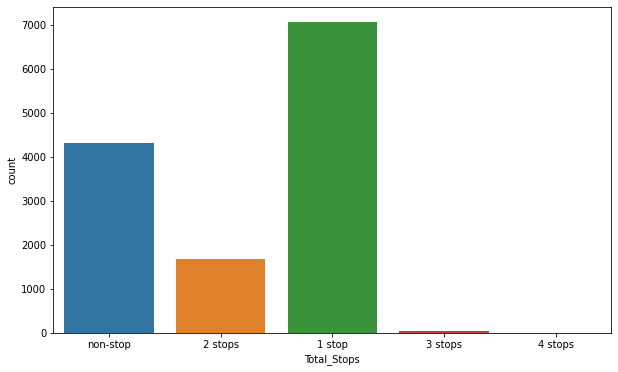

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data["Total_Stops"])

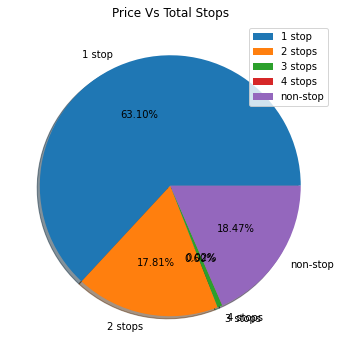

In [ ]:
##lets compare with price
plt.figure(figsize=(15,6))
plt.title("Price Vs Total Stops")
label=data.groupby("Total_Stops")["Price"].sum().index
value=data.groupby("Total_Stops")["Price"].sum().values
plt.pie(value,labels=label,autopct="%0.2f%%",shadow=True)
plt.legend()
plt.show()

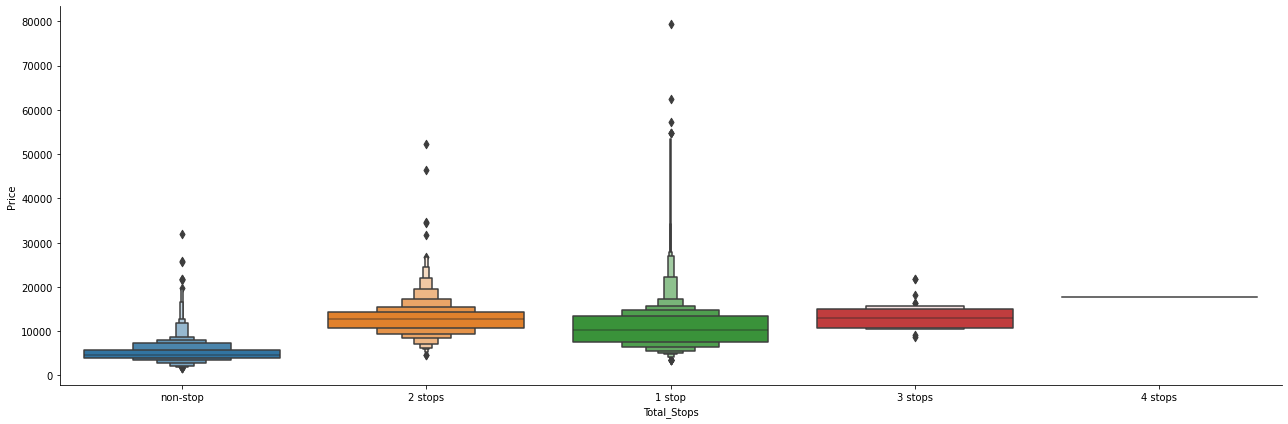

In [ ]:
##using the catplot as well
sns.catplot(y="Price",x="Total_Stops",data=data,aspect=3,height=6,kind="boxen")

## as Total_Stops is a oridinal category means if the number of stops will increase the price will also increase so in this we need to do label encoding according to their ranking

In [ ]:
data["Total_Stops"]=data["Total_Stops"].replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})

In [ ]:
data["Total_Stops"].value_counts()

1    7052
0    4321
2    1678
3      54
4       2
Name: Total_Stops, dtype: int64

In [ ]:
data.head(1)

,Total_Stops,Price,indentification,Journey_Day,Journey_Month,Arr_Hour,Arr_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other Airline,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897.0,train,24,3,01,10,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## As now all preprocessing has been done now we can split the train and test data

In [ ]:
train_df=data[data["indentification"]=="train"]
train_df.head(1)

,Total_Stops,Price,indentification,Journey_Day,Journey_Month,Arr_Hour,Arr_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other Airline,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897.0,train,24,3,01,10,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
test_df=data[data["indentification"]=="test"]
test_df.head(1)

,Total_Stops,Price,indentification,Journey_Day,Journey_Month,Arr_Hour,Arr_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other Airline,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,NaN,test,6,6,04,25,17,30,10,55,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
train_df.drop("indentification",axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
test_df.drop("indentification",axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
train_df.head(1)

,Total_Stops,Price,Journey_Day,Journey_Month,Arr_Hour,Arr_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other Airline,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897.0,24,3,01,10,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
test_df.drop("Price",axis=1,inplace=True)

In [ ]:
test_df.head(1)

,Total_Stops,Journey_Day,Journey_Month,Arr_Hour,Arr_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other Airline,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,04,25,17,30,10,55,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
final_df=train_df.copy()

In [ ]:
final_df.head(1)

,Total_Stops,Price,Journey_Day,Journey_Month,Arr_Hour,Arr_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other Airline,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897.0,24,3,01,10,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
final_df.shape

(10462, 27)

# Feature Selection Part

### here we look some best feature will can be important for the target variable price and this work can be done in using 3 technuies

1.   heatmap
2.   feature_importance_ by ExtraTreesRegressor
3. SelectKBeast



In [ ]:
final_df.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Arr_Hour',
       'Arr_Minute', 'Dep_Hour', 'Dep_Minute', 'Duration_Hour',
       'Duration_Minute', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_Other Airline', 'Airline_SpiceJet', 'Airline_Vistara',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

<AxesSubplot:>

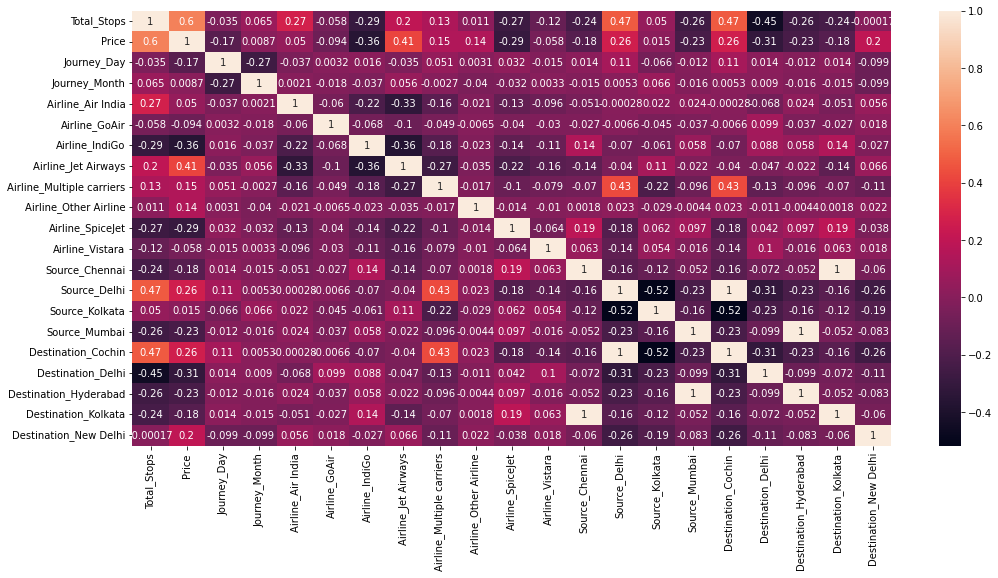

In [ ]:
#find the correclation b\w dependent and independent feature using the heatmap
plt.figure(figsize=(17,8))
sns.heatmap(final_df.corr(),annot=True)

As from above heatmap we find that :

1.   Source_Mumbai and Source_Hyderabad are highly correlated and can be drop one from them.
2.   Source_Chennai and Source_Kolkata are highly correlated and can be drop one from them.





In [ ]:
final_df=final_df.drop(["Source_Mumbai","Source_Chennai"],axis=1)

<AxesSubplot:>

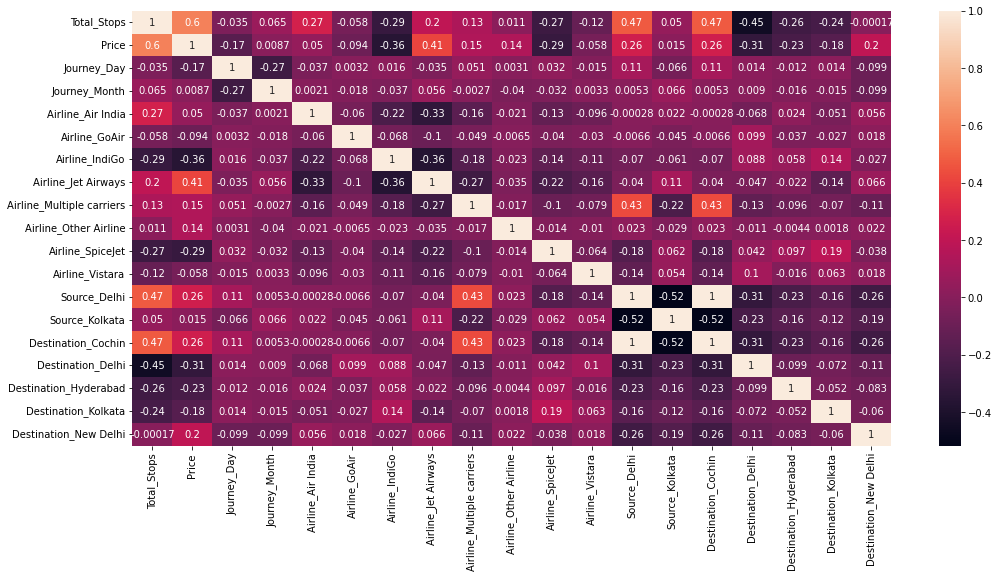

In [ ]:
#again check using heatmap
plt.figure(figsize=(17,8))
sns.heatmap(final_df.corr(),annot=True)

In [ ]:
final_df.shape

(10462, 25)

In [ ]:
final_df.head(1)

,Total_Stops,Price,Journey_Day,Journey_Month,Arr_Hour,Arr_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other Airline,Airline_SpiceJet,Airline_Vistara,Source_Delhi,Source_Kolkata,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897.0,24,3,01,10,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
y=pd.DataFrame(final_df["Price"])
x=final_df.drop("Price",axis=1)

In [ ]:
x.head(1)

,Total_Stops,Journey_Day,Journey_Month,Arr_Hour,Arr_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other Airline,Airline_SpiceJet,Airline_Vistara,Source_Delhi,Source_Kolkata,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,01,10,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
x.describe()

,Total_Stops,Journey_Day,Journey_Month,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other Airline,Airline_SpiceJet,Airline_Vistara,Source_Delhi,Source_Kolkata,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,0.802332,12.630090,5.534601,0.161919,0.018543,0.195278,0.353661,0.114318,0.002198,0.077901,0.045689,0.415313,0.273370,0.415313,0.120914,0.066622,0.036418,0.087364
std,0.660609,8.791635,2.995344,0.368394,0.134912,0.396434,0.478128,0.318213,0.046838,0.268029,0.208820,0.492799,0.445711,0.492799,0.326043,0.249378,0.187336,0.282381
min,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,21.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,27.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x.head(1)

,Total_Stops,Journey_Day,Journey_Month,Arr_Hour,Arr_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other Airline,Airline_SpiceJet,Airline_Vistara,Source_Delhi,Source_Kolkata,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,01,10,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
def c_int(x):
  try:
    x=int(x)
    return x
  except:
    return  "some error is accuring"

In [ ]:
c_int("39m")

'some error is accuring'

In [ ]:
c=["Arr_Hour","Arr_Minute",	"Dep_Hour",	"Dep_Minute",	"Duration_Hour",	"Duration_Minute" ]
for i in c:
  x[i]=x[i].apply(c_int)


(array([5.992e+03, 4.207e+03, 1.810e+02, 6.600e+01, 7.000e+00, 1.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1759. ,  9534.3, 17309.6, 25084.9, 32860.2, 40635.5, 48410.8,
        56186.1, 63961.4, 71736.7, 79512. ]),
 <BarContainer object of 10 artists>)

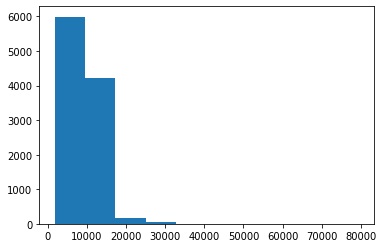

In [ ]:
plt.hist(y)

<AxesSubplot:xlabel='Price', ylabel='Density'>

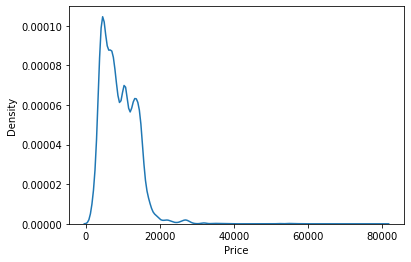

In [ ]:
sns.kdeplot(final_df["Price"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


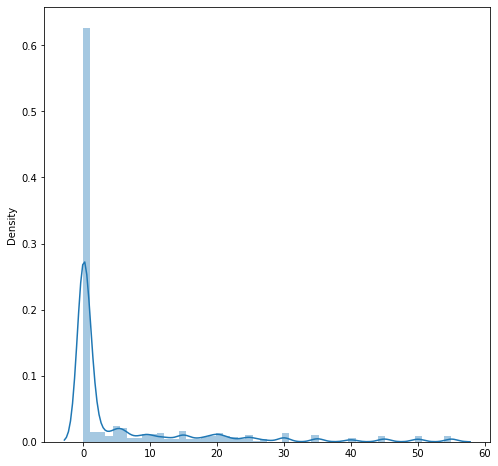

In [ ]:
plt.figure(figsize = (8, 8))
sns.distplot(x)
plt.show()

In [ ]:
#as price or our target varible in not normally distributed then we will make is normally distributed


In [ ]:
from scipy import stats

In [ ]:
np.array(y)

array([[ 3897.],
       [ 7662.],
       [13882.],
       ...,
       [ 7229.],
       [12648.],
       [11753.]])

In [ ]:
np.array(y).ravel()    #ravel() is used for make the data  in one dimension

array([ 3897.,  7662., 13882., ...,  7229., 12648., 11753.])

In [ ]:
fitted_data, fitted_lambda = stats.boxcox(np.array(y).ravel())

In [ ]:
print(fitted_lambda)
fitted_data

0.17703331002023934


array([18.76450002, 21.86846428, 24.92145589, ..., 21.58653507,
       24.42176715, 24.033602  ])

(array([2.470e+02, 1.652e+03, 2.678e+03, 2.716e+03, 2.733e+03, 3.420e+02,
        7.800e+01, 7.000e+00, 7.000e+00, 2.000e+00]),
 array([15.55765836, 17.60077882, 19.64389929, 21.68701975, 23.73014021,
        25.77326068, 27.81638114, 29.8595016 , 31.90262206, 33.94574253,
        35.98886299]),
 <BarContainer object of 10 artists>)

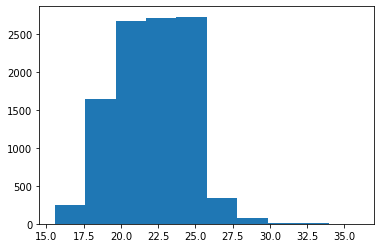

In [ ]:
plt.hist(fitted_data)

Now Price Data  is looking more toward the normal distribution

In [ ]:
y=fitted_data

In [ ]:
y

array([18.76450002, 21.86846428, 24.92145589, ..., 21.58653507,
       24.42176715, 24.033602  ])

In [ ]:
y=pd.DataFrame(y)

In [ ]:
x1=x.copy()
y1=y.copy()

Important Feature using ExtraTreesRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
selection=ExtraTreesRegressor()
selection.fit(x1,y1)

ExtraTreesRegressor()

In [ ]:
selection.feature_importances_          ##these are with respect to each columns

array([0.25126701, 0.08976967, 0.04833478, 0.01880364, 0.01585164,
       0.01904903, 0.01741891, 0.16868581, 0.01326802, 0.02340459,
       0.00245044, 0.02639521, 0.14714064, 0.01623755, 0.00895372,
       0.0073704 , 0.00831768, 0.02675101, 0.0057472 , 0.02681524,
       0.01581511, 0.02180263, 0.00173229, 0.01861779])

In [ ]:
feat_imp=pd.Series(selection.feature_importances_,index=[x1.columns])
feat_imp

Total_Stops                  0.251267
Journey_Day                  0.089770
Journey_Month                0.048335
Arr_Hour                     0.018804
Arr_Minute                   0.015852
Dep_Hour                     0.019049
Dep_Minute                   0.017419
Duration_Hour                0.168686
Duration_Minute              0.013268
Airline_Air India            0.023405
Airline_GoAir                0.002450
Airline_IndiGo               0.026395
Airline_Jet Airways          0.147141
Airline_Multiple carriers    0.016238
Airline_Other Airline        0.008954
Airline_SpiceJet             0.007370
Airline_Vistara              0.008318
Source_Delhi                 0.026751
Source_Kolkata               0.005747
Destination_Cochin           0.026815
Destination_Delhi            0.015815
Destination_Hyderabad        0.021803
Destination_Kolkata          0.001732
Destination_New Delhi        0.018618
dtype: float64

In [ ]:
len(x.columns)

24

<AxesSubplot:>

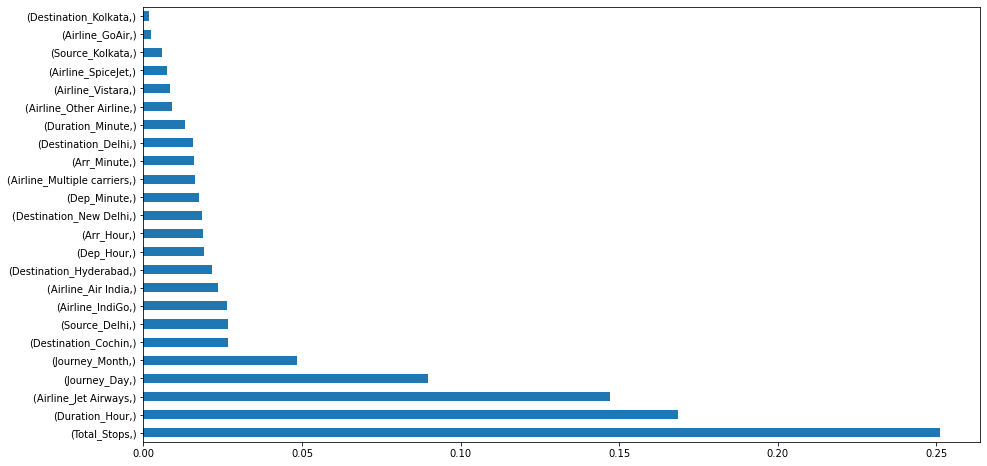

In [ ]:
## make a visuliation using plot
plt.figure(figsize=(15,8))
feat_imp.nlargest(24).plot(kind="barh")

This is the all features according to their importanct and if we want to drop any we can drop

In [ ]:
## as there two columns named: Destination_kolkata and Airline_GoAir are not too much important so we are going to drop them

In [ ]:
x=x.drop(["Destination_Kolkata","Airline_GoAir"],axis=1)


In [ ]:
x.head(1)

,Total_Stops,Journey_Day,Journey_Month,Arr_Hour,Arr_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute,Airline_Air India,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other Airline,Airline_SpiceJet,Airline_Vistara,Source_Delhi,Source_Kolkata,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_New Delhi
0,0,24,3,1,10,22,20,2,50,0,1,0,0,0,0,0,0,0,0,0,0,1


# Now time to split the data in train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
x_train.shape

(7009, 22)

In [ ]:
x_test.shape

(3453, 22)

# Standardiiztion

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x_scaler=StandardScaler()
x_scaler.fit(x_train)    #fit only on the train dataset to avoid the data leakage

StandardScaler()

In [ ]:
x_train=x_scaler.transform(x_train)
x_test=x_scaler.transform(x_test)

In [ ]:
x_train

array([[ 0.29851406, -0.76291018,  2.17507304, ..., -0.36500075,
        -0.26901379, -0.31234141],
       [ 1.82128338,  0.60469888, -0.1781345 , ..., -0.36500075,
        -0.26901379, -0.31234141],
       [ 1.82128338,  0.60469888, -0.1781345 , ..., -0.36500075,
        -0.26901379, -0.31234141],
       ...,
       [ 0.29851406, -0.99084503, -0.85047951, ..., -0.36500075,
        -0.26901379, -0.31234141],
       [-1.22425526,  1.63040568, -0.514307  , ..., -0.36500075,
        -0.26901379, -0.31234141],
       [-1.22425526, -0.87687761,  1.16655553, ..., -0.36500075,
        -0.26901379, -0.31234141]])

In [ ]:
y_scaler=StandardScaler()
y_scaler.fit(y_train)   #fit only on the train dataset to avoid the data leakage

StandardScaler()

In [ ]:
y_train=y_scaler.transform(y_train)
y_test=y_scaler.transform(y_test)

In [ ]:
y_train

array([[-0.24090878],
       [ 0.54401864],
       [ 0.98705626],
       ...,
       [-0.88979384],
       [-0.57892251],
       [-1.51505137]])

# Train the Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model=RandomForestRegressor()

In [ ]:
model.fit(x_train,y_train)

<ipython-input-388-4719cf73997a>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestRegressor()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
model.score(x_train,y_train)

0.9664144966397049

In [ ]:
model.score(x_test,y_test)

0.8506893776081801

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


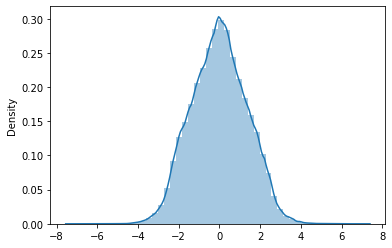

In [ ]:
sns.distplot(y_test-y_pred)
plt.show()

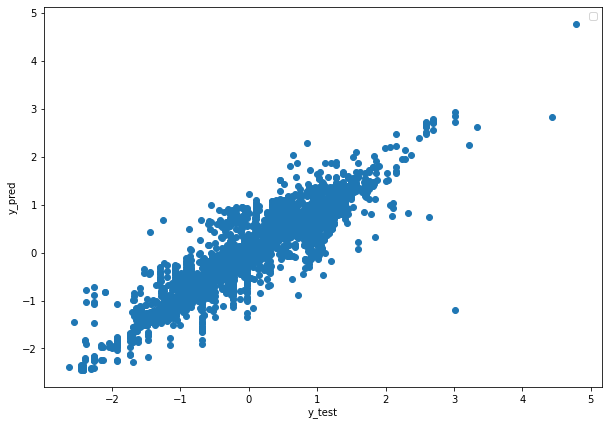

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.legend()
plt.show()

In [ ]:
x.columns

Index(['Total_Stops', 'Journey_Day', 'Journey_Month', 'Arr_Hour', 'Arr_Minute',
       'Dep_Hour', 'Dep_Minute', 'Duration_Hour', 'Duration_Minute',
       'Airline_Air India', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Multiple carriers', 'Airline_Other Airline',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Delhi', 'Source_Kolkata',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_New Delhi'],
      dtype='object')

In [ ]:
test_df.columns

Index(['Total_Stops', 'Journey_Day', 'Journey_Month', 'Arr_Hour', 'Arr_Minute',
       'Dep_Hour', 'Dep_Minute', 'Duration_Hour', 'Duration_Minute',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_Other Airline', 'Airline_SpiceJet', 'Airline_Vistara',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [ ]:
t_df=test_df.drop(["Source_Mumbai","Source_Chennai","Destination_Kolkata","Airline_GoAir"],axis=1)

In [ ]:
print(len(x.columns))
print(len(t_df.columns))

22
22


In [ ]:
t_df.head(1)

,Total_Stops,Journey_Day,Journey_Month,Arr_Hour,Arr_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute,Airline_Air India,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other Airline,Airline_SpiceJet,Airline_Vistara,Source_Delhi,Source_Kolkata,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_New Delhi
0,1,6,6,04,25,17,30,10,55,0,0,1,0,0,0,0,1,0,1,0,0,0


In [ ]:
test_scaler=StandardScaler()

In [ ]:
t_df=test_scaler.fit_transform(t_df)
t_df

array([[ 0.26109306, -0.70281114,  0.13104894, ..., -0.36901001,
        -0.27502819, -0.31080594],
       [ 0.26109306, -0.8195198 ,  2.10611698, ..., -0.36901001,
        -0.27502819, -0.31080594],
       [ 0.26109306,  1.04781869, -0.19812907, ..., -0.36901001,
        -0.27502819, -0.31080594],
       ...,
       [ 0.26109306, -1.05293711,  0.13104894, ..., -0.36901001,
        -0.27502819, -0.31080594],
       [ 0.26109306, -1.05293711,  0.13104894, ..., -0.36901001,
        -0.27502819, -0.31080594],
       [ 0.26109306,  0.34756676,  0.13104894, ..., -0.36901001,
        -0.27502819, -0.31080594]])

In [ ]:
y_pred_df=model.predict(t_df)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn import metrics

In [ ]:
y_test.shape

(3453, 1)

In [ ]:
y_pred_df.shape

(2645,)

In [ ]:
metrics.r2_score(y_test,y_pred)

0.8506893776081801

# As our model is going toward overfitting, we need to do hyperparameter tuning

In [ ]:
##using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
hyperparameter_space = {
    "n_estimators":[i for i in range(10,30,2)],
    'max_depth':[i for i in range(2,10)], 
                        "criterion":["squared_error","absolute_error"],
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'min_samples_split':[1,2,3,4,5,6,8,10]}

In [ ]:
hyperparameter_space

{'n_estimators': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28],
 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
 'criterion': ['squared_error', 'absolute_error'],
 'min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30],
 'min_samples_split': [1, 2, 3, 4, 5, 6, 8, 10]}

In [ ]:
rs = RandomizedSearchCV(model, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="neg_mean_squared_error", random_state=0,
                        n_jobs=-1, cv=5, return_train_score=True,verbose=1)

In [ ]:
rs.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", lin

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10,
                                                             20, 30],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              8, 10],
                                        'n_estimators': [10, 12, 14, 16, 18, 20,
                                                         22, 24, 26, 28]},
                   random_state=0, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=1)

In [ ]:
rs.best_params_

{'n_estimators': 28,
 'min_samples_split': 6,
 'min_samples_leaf': 8,
 'max_depth': 9,
 'criterion': 'squared_error'}

In [ ]:
y_prediction=rs.predict(x_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


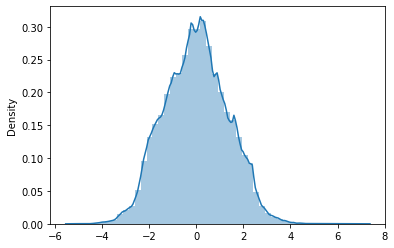

In [ ]:
sns.distplot(y_test-y_prediction)
plt.show()

In [ ]:
metrics.r2_score(y_test,y_prediction)

0.8418152895176423

In [ ]:
#saving the model
import pickle

In [ ]:
#open a file where you want to store the model
file=open("Flight_price_model.pkl","wb")
pickle.dump(rs,file)

In [ ]:
rs.predict([[29,59,25,2,5,2,52,2,8,1,1,4,1,4,1,4,1,4,1,4,3,3]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([-0.72966614])